In [3]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import itertools

In [15]:
mat = loadmat('ex4data1.mat')
raw_X = mat['X']
raw_y = mat['y']
print(raw_X.shape, raw_y.shape)

(5000, 400) (5000, 1)


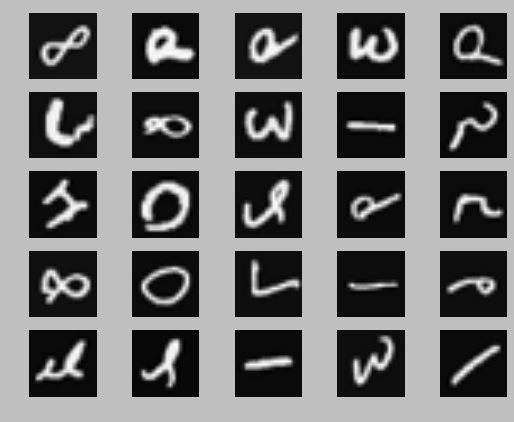

In [5]:
plot_indices = itertools.product(range(5), range(5))
images_indices = np.random.randint(0, 5000, size=25)

(f, ax) = plt.subplots(5, 5)
for (i, (j, k)) in zip(images_indices, plot_indices):
    image = raw_X[i, :].reshape(20, 20)
    ax[j, k].imshow(image, cmap='gray')
    ax[j, k].axis('off')
    
plt.show()

In [10]:
def to_one_hot_labels(labels, k):
    m = len(labels)
    y = np.zeros((m, k))
    # matlabl indices: 1 to 10, python indices: 0 to 9
    labels = labels - 1
    for i in range(m):
        y[i, labels[i, 0]] = 1
        
    return y

In [16]:
X = raw_X.copy()
y = to_one_hot_labels(raw_y.copy(), k=10)

In [17]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

g = sigmoid

In [71]:
def J(h_theta_x, y, l, thetas):
    y1 = np.multiply(-y, np.log(h_theta_x)).sum()
    y0 = np.multiply(1 - y, np.log(1 - h_theta_x)).sum()
    m = h_theta_x.shape[0]
    cost = (1.0 / m) * (y1 - y0)
    
    regs = [(t[:, 1:] ** 2).sum() for t in thetas]
    reg = (l / (2.0 * m)) * sum(regs)
    
    return cost + reg

In [72]:
mat = loadmat('ex4weights.mat')
theta1 = mat['Theta1']
theta2 = mat['Theta2']

def h_theta(x):
    bias = np.ones((x.shape[0], 1))
    a1 = np.hstack([bias, x]).T
    
    z2 = theta1.dot(a1)
    a2 = g(z2)
    bias = np.ones((1, a2.shape[1]))
    a2 = np.vstack([bias, a2])
    
    z3 = theta2.dot(a2)
    a3 = g(z3)
    return a3.T
    
h_theta(X).shape

(5000, 10)

In [73]:
l = 1

h_theta_x = h_theta(X)
J(h_theta_x, y, l, [theta1, theta2])

0.38376985909092365